In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs', split='train')
df = dataset.to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/dawn/anaconda3/envs/DA_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


pie(): plot a pie chart.
Common parameters:
y - Column label or position. This is used to provide data points for the pie.
labels - Indexes to use for labeling the wedges with their corresponding data values.
colors - A list of colors to use for the different sections of the pie.
autopct - A string or function used to label the wedges with their numeric value. The label will be placed inside the wedge.
startangle - Rotates the start of the pie chart by angle degrees counterclockwise from the x-axis.
explode - An array which specifies the fraction of the radius with which to offset each wedge.
Syntax: plt.pie(df['data'], labels=df['category'], autopct='%1.1f%%', startangle=90, colors=['red', 'green', 'blue', 'yellow'], explode=(0.1, 0, 0, 0))
Chart shows how individual parts make up a whole.

In [5]:
# Analyze only Data Analysts
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [6]:
work_from_home = df_DA['job_work_from_home'].value_counts()
work_from_home

job_work_from_home
False    182749
True      13326
Name: count, dtype: int64

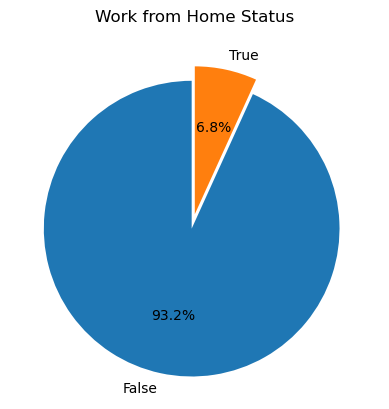

In [7]:
plt.pie(work_from_home, labels=['False', 'True'], autopct= '%1.1f%%',startangle=90, explode=(0.1, 0))
plt.title('Work from Home Status')
plt.show()

In [8]:
job_no_degree = df_DA['job_no_degree_mention'].value_counts()

In [9]:
job_health_insurance = df_DA['job_health_insurance'].value_counts()
job_health_insurance

job_health_insurance
False    171351
True      24724
Name: count, dtype: int64

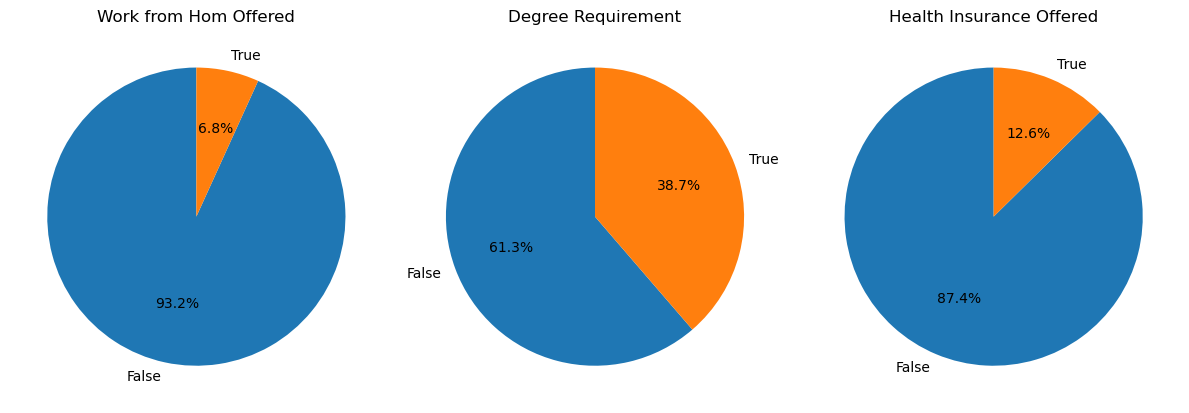

In [10]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

plt.subplot(1, 3, 1)
plt.pie(work_from_home, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Work from Hom Offered')

# Job No Degree
plt.subplot(1, 3, 2)
plt.pie(job_no_degree, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Degree Requirement')

# Job Health Insurance
plt.subplot(1, 3, 3)
plt.pie(job_health_insurance, labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
plt.title('Health Insurance Offered')

plt.tight_layout()
plt.show()

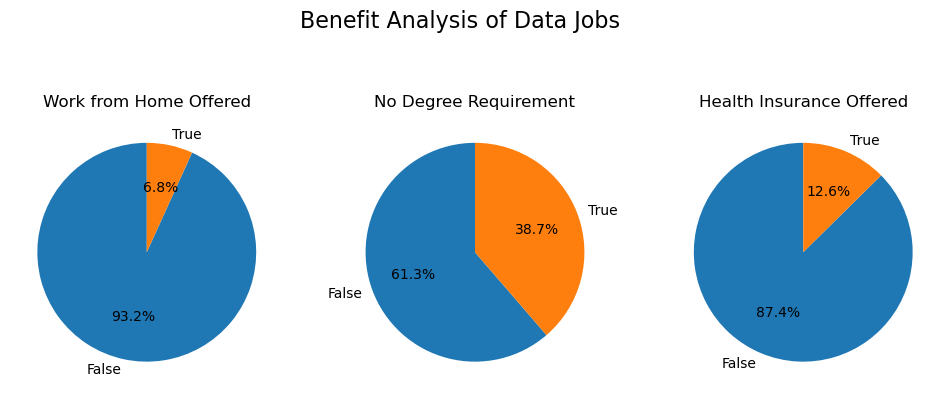

In [11]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'No Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)
plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

In [12]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parame